1. Load and Explore the Fashion MNIST Dataset:

Load the Fashion MNIST dataset from Keras. Familiarize yourself with the dataset's structure and the classes it contains



In [31]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

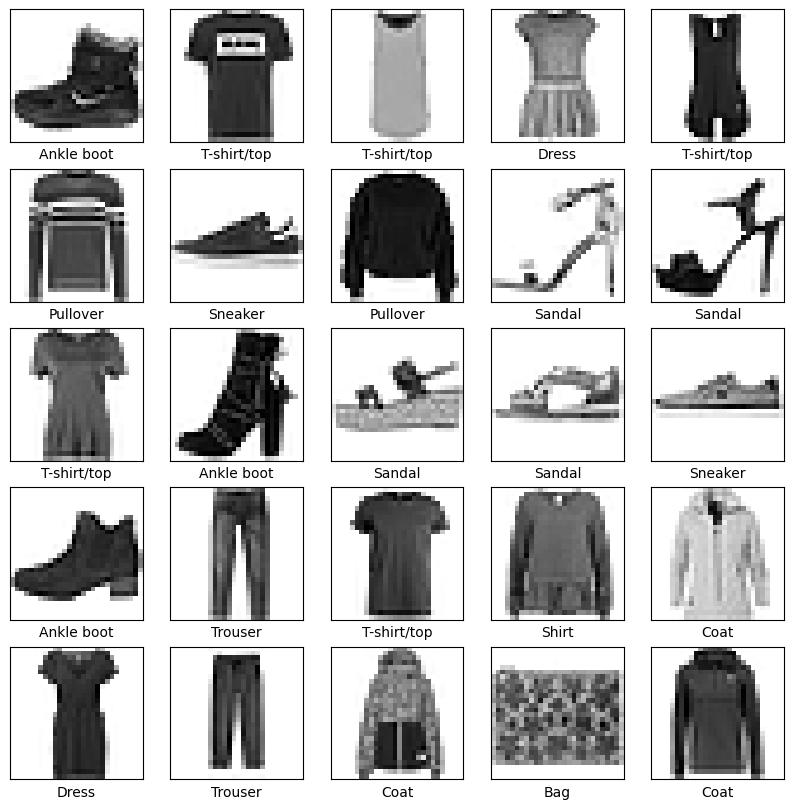

In [29]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0
# Verify the data by plotting a few images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

2.Data Preprocessing:

Preprocess the data as needed for training an ANN. This may include scaling the pixel values to a range between 0 and 1 and reshaping the data.

In [7]:
# Reshape the data to fit the ANN input
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print the shapes to verify
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (60000, 784)
y_train shape: (60000, 10, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10, 10)


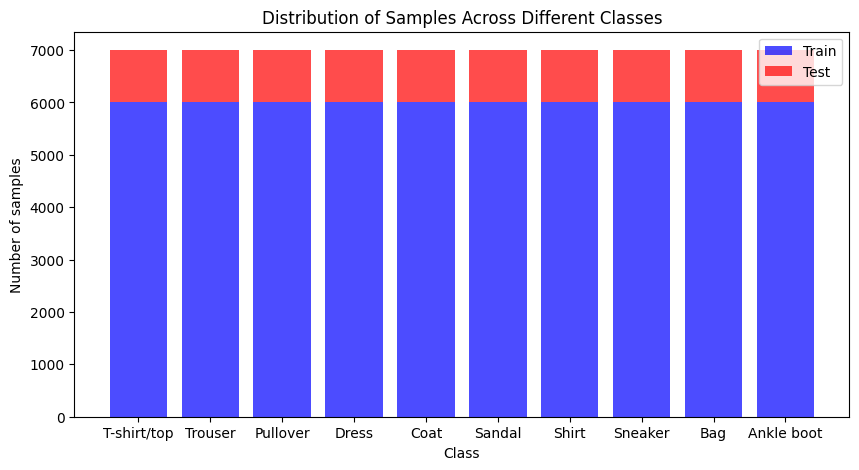

In [12]:
# Count the number of samples per class in the training set
train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(class_names, train_class_counts, color='blue', alpha=0.7, label='Train')
plt.bar(class_names, test_class_counts, color='red', alpha=0.7, label='Test', bottom=train_class_counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Distribution of Samples Across Different Classes')
plt.legend()
plt.show()


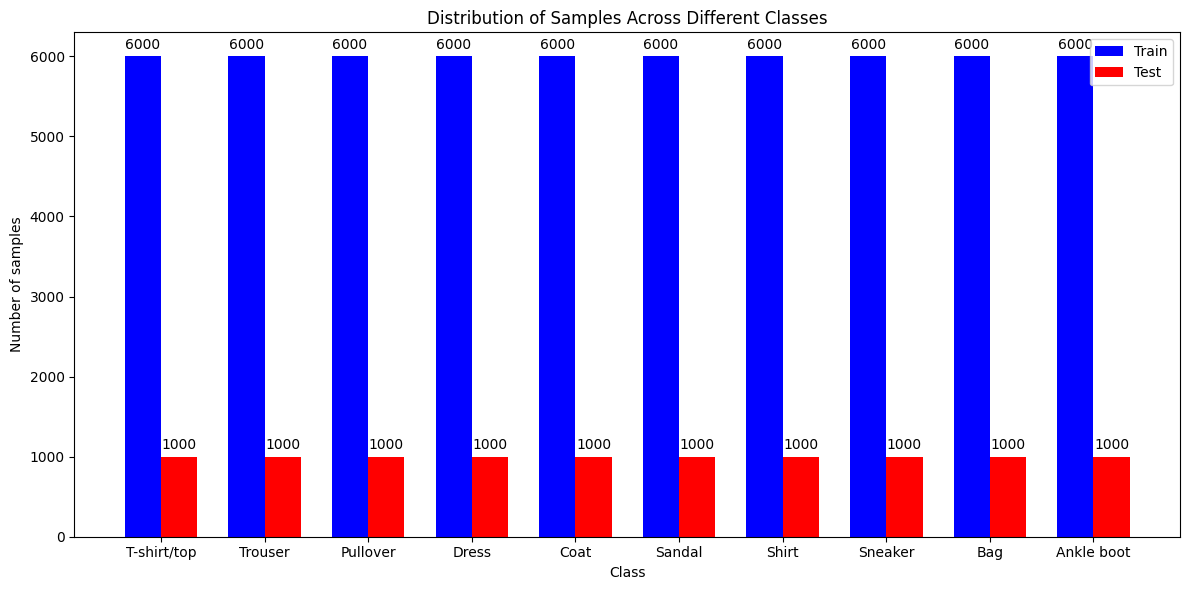

In [13]:
# Count the number of samples per class in the training and test sets
train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)

# Create the bar chart
x = np.arange(len(class_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_class_counts, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_class_counts, width, label='Test', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Class')
ax.set_ylabel('Number of samples')
ax.set_title('Distribution of Samples Across Different Classes')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


4.Build an Artificial Neural Network:

Design and implement an ANN model for classifying Fashion MNIST images. Experiment with different architectures, activation functions, and layer configurations.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5.Compile the Model:

Compile the ANN model using an appropriate loss function, optimizer, and evaluation metric. Choose metrics such as accuracy to monitor during training.

In [19]:
#5 Train the model
history = model.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test_oh)
)


Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4773 - accuracy: 0.8256 - val_loss: 0.4970 - val_accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3627 - accuracy: 0.8675 - val_loss: 0.3838 - val_accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3243 - accuracy: 0.8799 - val_loss: 0.3536 - val_accuracy: 0.8720
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3002 - accuracy: 0.8881 - val_loss: 0.3491 - val_accuracy: 0.8728
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2844 - accuracy: 0.8946 - val_loss: 0.3590 - val_accuracy: 0.8704
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2682 - accuracy: 0.8996 - val_loss: 0.3285 - val_accuracy: 0.8832
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2557 - accuracy: 0.9031 - val_loss: 0.3362 -

6.Train the Model:

Train the compiled model on the training set. Monitor and visualize the training process using training loss and accuracy.


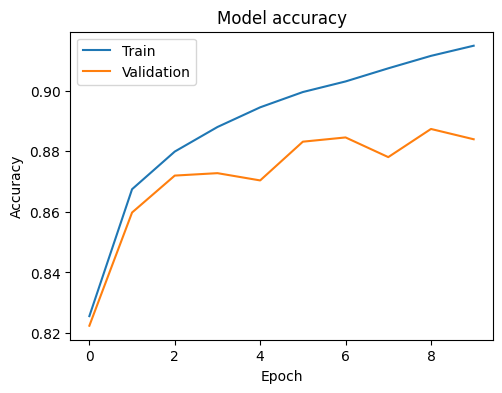

In [20]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')



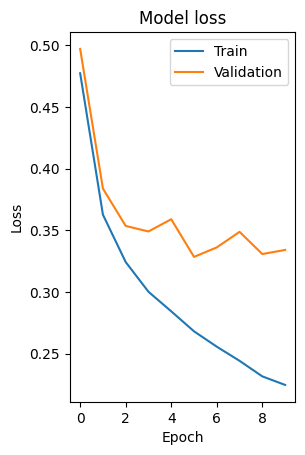

In [21]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

7. Evaluate the Model:

Evaluate the trained model on the validation set. Calculate and visualize both training and validation losses and accuracy.


In [22]:
#7
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_oh, verbose=2)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


313/313 - 1s - loss: 0.3341 - accuracy: 0.8840 - 848ms/epoch - 3ms/step
Test loss: 0.334124892950058
Test accuracy: 0.8840000033378601


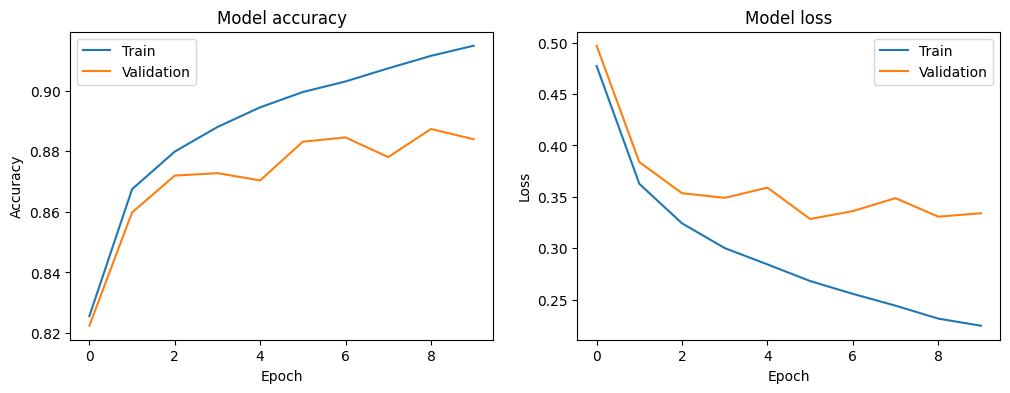

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


8. Test Set Prediction:

Use the trained model to predict classes for the test set. Display a few sample predictions along with the corresponding images.

313/313 [==============================] - 2s 7ms/step


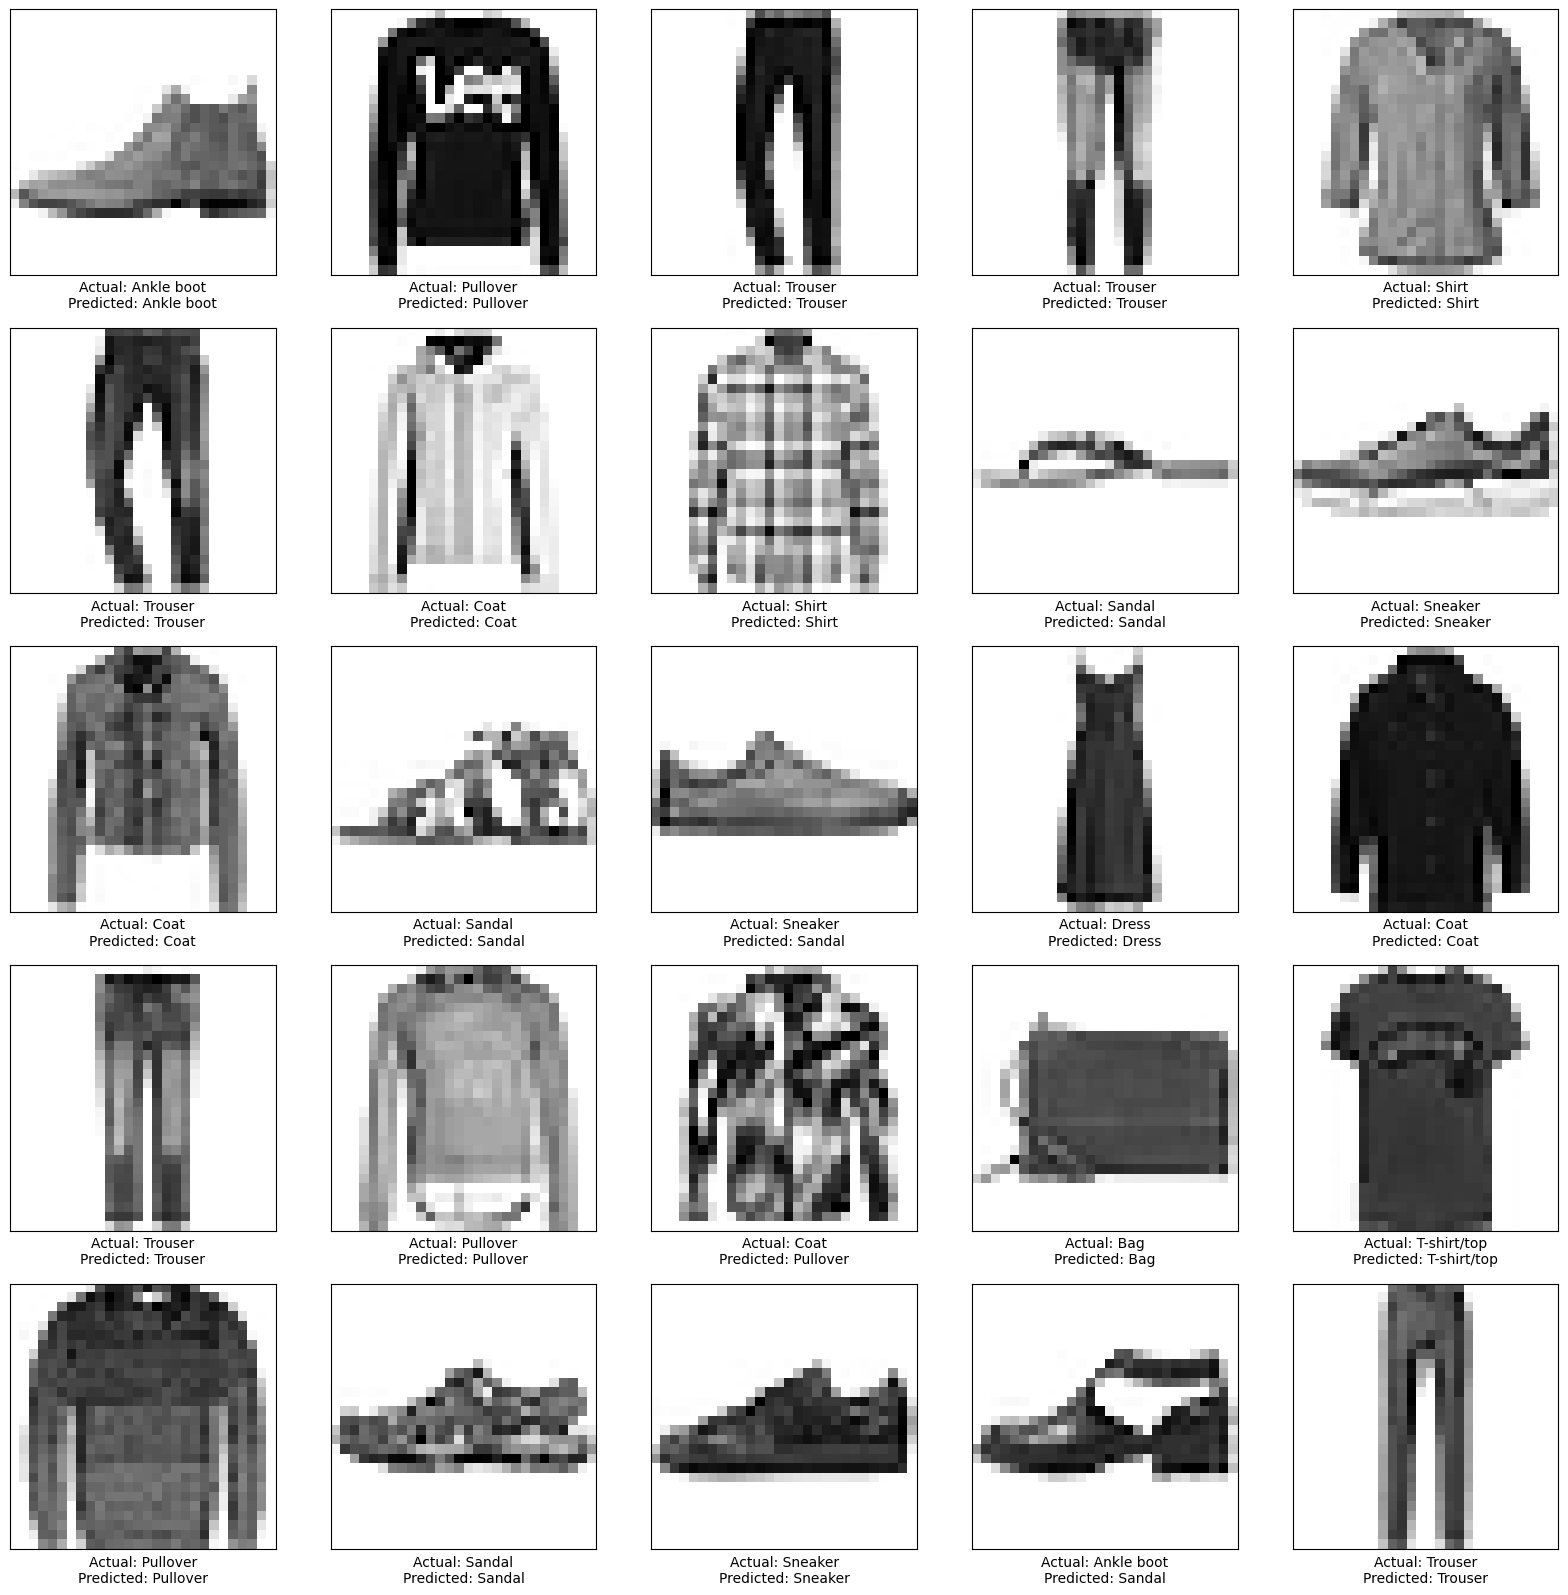

In [26]:
#8
# Use the trained model to make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

import matplotlib.pyplot as plt

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot sample images with predictions
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {class_names[y_test[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
plt.show()
